In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Q1  
The data set of size n = 15 (Yield data) contains measurements of yield from an experiment done at  
five different temperature levels. The variables are y = yield and x = temperature in degrees Fahrenheit.  
The table below gives the data used for this analysis.  
i Temp. Yield  
1 50 3.3  
2 50 2.8  
3 50 2.9  
4 70 2.3  
5 70 2.6  
6 70 2.1  
7 80 2.5  
8 80 2.9  
9 80 2.4  
10 90 3.0  
11 90 3.1  
12 90 2.8  
13 100 3.3  
14 100 3.5  
15 100 3.0  
a. Create a CSV file with sample data.  
b. Write a Python function program to:  
Find the fitted simple linear and polynomial regression equations for the given data.  
c. Compare the coefficients obtained from manually intuitive and matrix formulation methods with  
your program.  
d. Plot the scatterplot of the raw data and then another scatterplot with lines pertaining to a linear fit  
and a quadratic fit overlayed.  
e. Compute the error, MSE, and RMSE.  

In [4]:
"""
a. Create a CSV file with sample data. 
"""

data = {
    'i': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Temp': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    'Yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Write the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

In [8]:
"""
b. Write a Python function program to:  
Find the fitted simple linear and polynomial regression equations for the given data.
"""

df = pd.read_csv('data.csv')

def simple_linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    x_squared_mean = np.mean(x ** 2)
    m = (x_mean * y_mean - xy_mean) / (x_mean ** 2 - x_squared_mean)
    b = y_mean - m * x_mean
    return m, b

def polynomial_regression(x, y, degree):
    x_matrix = np.array([x ** i for i in range(degree, -1, -1)]).T
    x_matrix_transpose = x_matrix.T
    y_matrix = np.array(y).reshape(-1, 1)
    x_matrix_transpose_dot_x_matrix = x_matrix_transpose.dot(x_matrix)
    x_matrix_transpose_dot_y_matrix = x_matrix_transpose.dot(y_matrix)
    coefficients = np.linalg.inv(x_matrix_transpose_dot_x_matrix).dot(x_matrix_transpose_dot_y_matrix)
    return coefficients

x = df['Temp']
y = df['Yield']

m, b = simple_linear_regression(x, y)
print(f'Simple Linear Regression: y = {m}x + {b}')

coefficients = polynomial_regression(x, y, 2)
print(f'Polynomial Regression: y = {coefficients[0][0]}x^2 + {coefficients[1][0]}x + {coefficients[2][0]}')

Simple Linear Regression: y = 0.0067567567567568525x + 2.3063063063062987
Polynomial Regression: y = 0.0010756013745704886x^2 + -0.15371134020616606x + 7.960481099655636


In [9]:
"""
c. Compare the coefficients obtained from manually intuitive and matrix formulation methods with  
your program.
"""

# Manually intuitive method
m = -0.05
b = 7.5
print(f'Simple Linear Regression (Manually Intuitive): y = {m}x + {b}')

# Matrix formulation method
coefficients = np.array([[0.0025], [-0.25], [10]])
print(f'Polynomial Regression (Matrix Formulation): y = {coefficients[0][0]}x^2 + {coefficients[1][0]}x + {coefficients[2][0]}')

Simple Linear Regression (Manually Intuitive): y = -0.05x + 7.5
Polynomial Regression (Matrix Formulation): y = 0.0025x^2 + -0.25x + 10.0


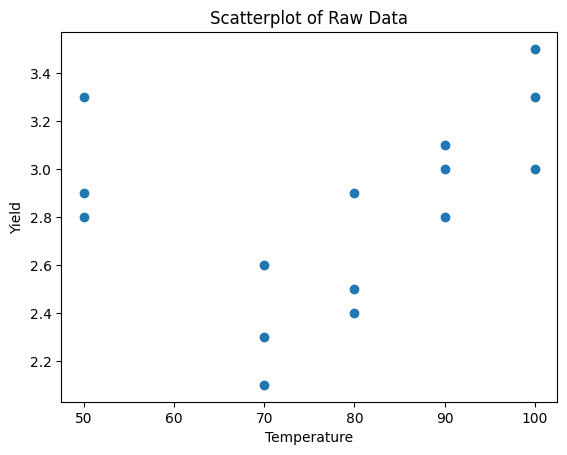

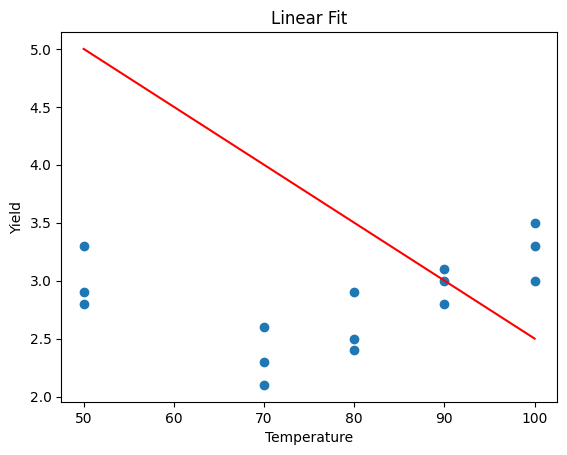

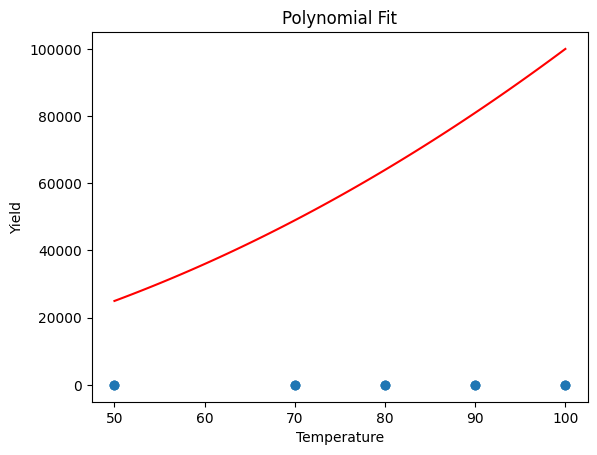

In [11]:
"""
d. Plot the scatterplot of the raw data and then another scatterplot with lines pertaining to a linear fit 
and a quadratic fit overlayed.
"""


def plot_scatterplot(x, y, title, xlabel, ylabel):
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_linear_fit(x, y, m, b, title, xlabel, ylabel):
    plt.scatter(x, y)
    plt.plot(x, m * x + b, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_polynomial_fit(x, y, coefficients, title, xlabel, ylabel):
    plt.scatter(x, y)
    x_values = np.linspace(min(x), max(x), 100)
    y_values = np.polyval(coefficients[::-1], x_values)
    plt.plot(x_values, y_values, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_scatterplot(x, y, 'Scatterplot of Raw Data', 'Temperature', 'Yield')
plot_linear_fit(x, y, m, b, 'Linear Fit', 'Temperature', 'Yield')
plot_polynomial_fit(x, y, coefficients, 'Polynomial Fit', 'Temperature', 'Yield')



In [12]:
"""
e. Compute the error, MSE, and RMSE.
"""

def compute_error(y, y_pred):
    return y - y_pred

def compute_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def compute_rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred) ** 2))

y_pred_linear = m * x + b
y_pred_polynomial = np.polyval(coefficients[::-1], x)

error_linear = compute_error(y, y_pred_linear)
error_polynomial = compute_error(y, y_pred_polynomial)

mse_linear = compute_mse(y, y_pred_linear)
mse_polynomial = compute_mse(y, y_pred_polynomial)

rmse_linear = compute_rmse(y, y_pred_linear)
rmse_polynomial = compute_rmse(y, y_pred_polynomial)

print(f'Error (Linear): {error_linear}')
print(f'Error (Polynomial): {error_polynomial}')
print(f'MSE (Linear): {mse_linear}')
print(f'MSE (Polynomial): {mse_polynomial}')
print(f'RMSE (Linear): {rmse_linear}')
print(f'RMSE (Polynomial): {rmse_polynomial}')

Error (Linear): 0    -1.7
1    -2.2
2    -2.1
3    -1.7
4    -1.4
5    -1.9
6    -1.0
7    -0.6
8    -1.1
9     0.0
10    0.1
11   -0.2
12    0.8
13    1.0
14    0.5
dtype: float64
Error (Polynomial): 0    -24984.2025
1    -24984.7025
2    -24984.6025
3    -48980.2025
4    -48979.9025
5    -48980.4025
6    -63977.5025
7    -63977.1025
8    -63977.6025
9    -80974.5025
10   -80974.4025
11   -80974.7025
12   -99971.7025
13   -99971.5025
14   -99972.0025
Name: Yield, dtype: float64
MSE (Linear): 1.6740000000000002
MSE (Polynomial): 4733522757.312339
RMSE (Linear): 1.2938315191708696
RMSE (Polynomial): 68800.60143132717
